In [1]:
import numpy as np
import cv2
import pandas as pd
from pathlib import Path
import os

# plotting libs
import seaborn as sns
from matplotlib import pyplot as plt

# Setting the ast_node_interactivity to "all" will print
# each statement, not only the last one of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split

In [2]:
# Load an color image in grayscale
img = cv2.imread('data/mnistasjpg/trainingSet/0/img_1.jpg',0)

In [3]:
img.shape = (28,28)
pd.set_option('display.max_columns', None)
df = pd.DataFrame(img)
df
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(df)
#img = np.reshape(img, (1,-1))
#img.shape
#df_new = pd.DataFrame(img)
#df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,3,0,0,3,7,3,0,3,0,11,0,0,3,0,0,3,8,0,0,3,0,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,1,5,0,12,0,16,0,0,4,0,2,8,3,0,4,8,0,0,0,0,0
2,0,0,2,0,0,0,1,2,1,12,0,8,0,0,6,0,11,0,0,6,7,2,0,0,0,0,0,0
3,0,1,3,0,0,2,3,0,0,0,12,0,0,23,0,0,0,0,11,3,0,0,4,0,0,0,0,0
4,0,1,1,0,0,2,0,0,6,0,25,27,136,135,188,89,84,25,0,0,3,1,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,3,88,247,236,255,249,250,227,240,136,37,1,0,2,2,0,0,0,0,0
6,2,0,0,3,0,0,4,27,193,251,253,255,255,255,255,240,254,255,213,89,0,0,14,1,0,0,0,0
7,0,0,0,6,0,0,18,56,246,255,253,243,251,255,245,255,255,254,255,231,119,7,0,5,0,0,0,0
8,4,0,0,12,13,0,65,190,246,255,255,251,255,109,88,199,255,247,250,255,234,92,0,0,0,0,0,0
9,0,10,1,0,0,18,163,248,255,235,216,150,128,45,6,8,22,212,255,255,252,172,0,15,0,0,0,0


## load images and transform them into numpy arrays

In [4]:
def loadTrainingImages(dataPath, filename_features, filename_targets):
    file_features = Path(filename_features)
    file_targets = Path(filename_targets)
    if file_targets.is_file() and file_features.is_file():
        print("Files already exsists")
        features = np.load(filename_features)
        targets = np.load(filename_targets)
        return features, targets
    else:
        features = np.array([]).reshape(0,784)
        targets = np.array([]).reshape(0)
        for folder in os.listdir(dataPath):
            print(folder)
            for file in os.listdir(dataPath + folder + '/'):
                img = cv2.imread(dataPath + folder + '/' + file, 0)
                features = np.append(features, np.reshape(img,(1,-1)), axis=0)
                targets = np.append(targets, [int(folder)], axis=0)
        np.save(filename_features, features)
        np.save(filename_targets, targets)
        return features, targets       

features, targets = loadTrainingImages('data/mnistasjpg/trainingSet/', 'features.npy', 'targets.npy')

Files already exsists


## split train and test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2) 

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [8]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
clf.score(X_test, y_test)

0.96178571428571424

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_pred = clf.predict(X_test)

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
conf_matrix

array([[808,   0,   4,   0,   0,   0,   1,   0,   5,   0],
       [  0, 917,   3,   3,   2,   0,   3,   0,   3,   1],
       [  6,   2, 795,   3,   6,   0,   5,   6,   5,   1],
       [  2,   2,   9, 820,   0,   7,   4,   4,  12,   7],
       [  0,   0,   1,   0, 781,   0,   5,   2,   3,  19],
       [  1,   2,   1,   9,   0, 727,   3,   1,   7,   5],
       [  7,   0,   0,   0,   1,   4, 819,   0,   3,   0],
       [  1,   7,  11,   0,   2,   0,   0, 834,   2,  11],
       [  2,   5,   3,   9,   5,   5,   2,   2, 765,  17],
       [  6,   2,   1,  13,  13,   3,   0,  10,  11, 811]])

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=10, n_jobs=-1)

In [16]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
centers = kmeans.cluster_centers_

In [18]:
test_center = centers[7].reshape(28,28)

In [23]:
plt.matshow(test_center)

In [24]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

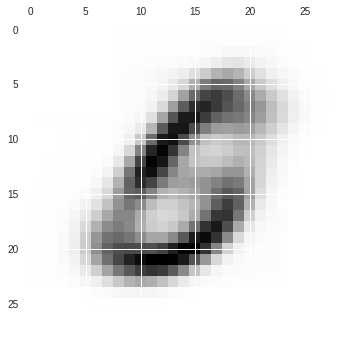

In [25]:
plt.show()

In [27]:
clf2 = NearestCentroid()

In [28]:
clf2.fit(X_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

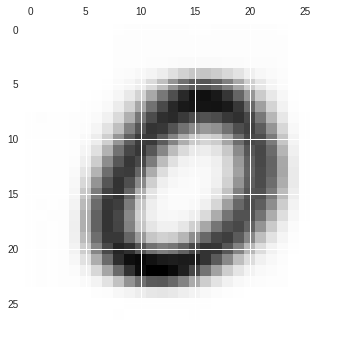

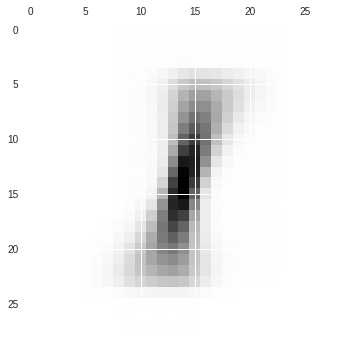

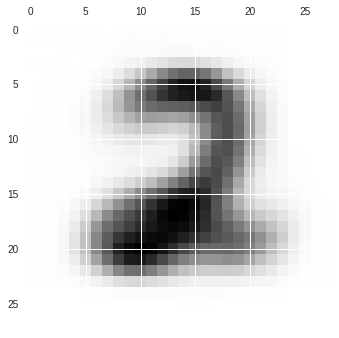

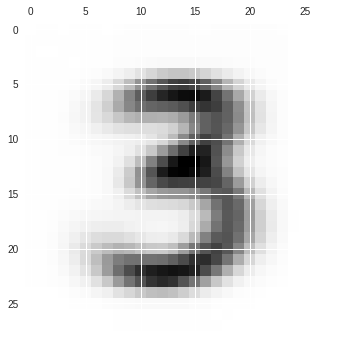

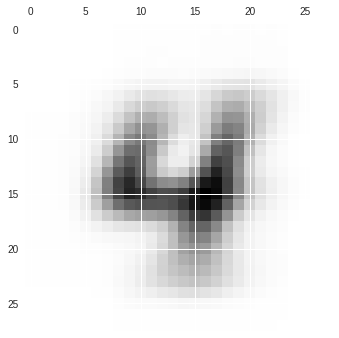

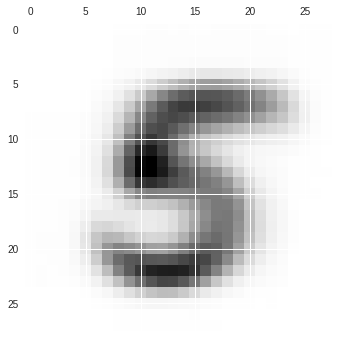

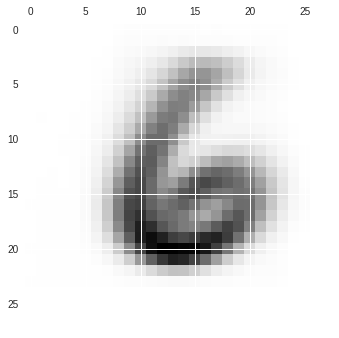

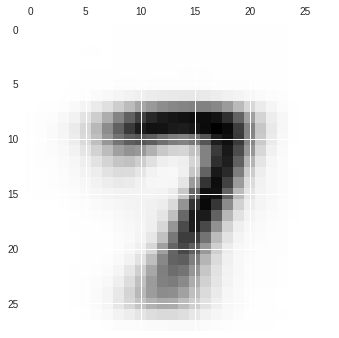

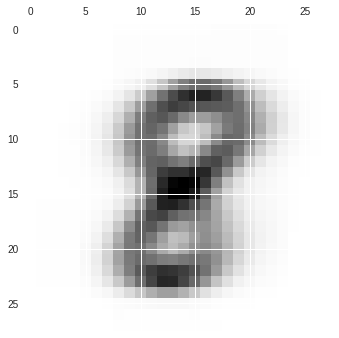

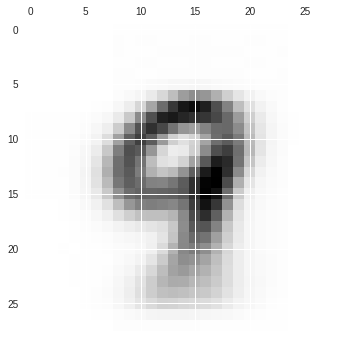

In [91]:
for i in range(0,10):
    centroids = clf2.centroids_[i]
    test = centroids.reshape(28,28)
    plt.matshow(test)
    plt.show()